Выполнить предварительную обработку данных на Python.

In [1]:
import pandas as pd
import io
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
# загружаем данные

# кринж-функция по строковым данным (reader чтение файла и его построчное редактирование)
def csv_redactor_cringe(path):
    spisok = []
    with open(path) as file:
        reader = csv.reader(file, delimiter = ',', skipinitialspace = True, doublequote = True)
        for row in reader:
            spisok.append(row)

    columns = spisok[0]
    matrix = spisok[1:]
    
    good_matrix = []

    for num_spisok in range(0,len(matrix)):
        stroka = ','.join(matrix[num_spisok]).replace(';"', '').replace('""', '"').replace(';;;','').replace('";;', '')
        with io.StringIO(stroka) as f:
                reader = csv.reader(f)
                for row in reader:
                        break
        for i,value in enumerate(row):
            if value == '':
                    row[i] = np.nan
        good_matrix.append(row)   

    df = pd.DataFrame(good_matrix, columns = columns)
    
    return df

df = csv_redactor_cringe('Богатые.csv')

# будем рассматривать только некоторые признаки из датасета
df = df[['rank', 'name', 'forbes_id', 'net_worth', 'age', 'country', 'industry', 'Source of Wealth', 'Marital Status',
         'Children', 'Education']]

### Задание 1

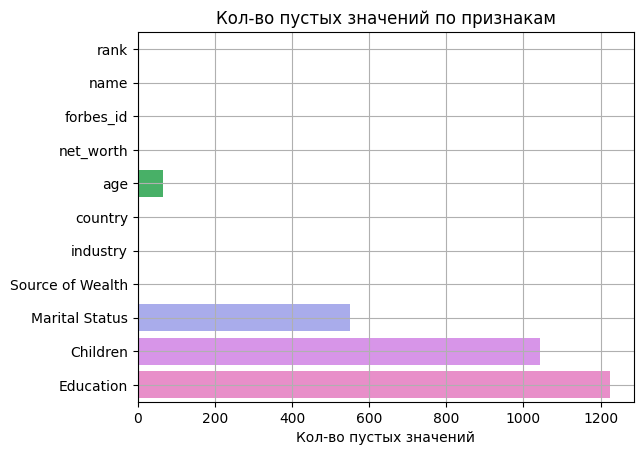

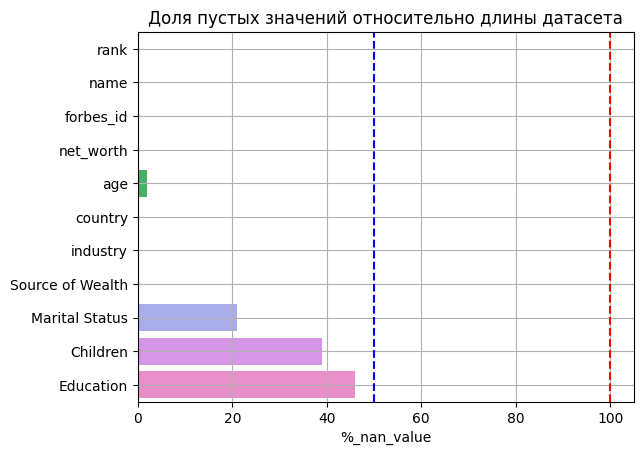

Уникальных значений в признаке Children: ['5.0' '10.0' '4.0' '3.0' '2.0' '6.0' '1.0' nan '7.0' '9.0' '8.0' '14.0'
 '15.0' '22.0' '11.0' '23.0']
Уникальных значений в признаке Martial: ['Married' 'Single' 'Engaged' 'In Relationship' 'Widowed, Remarried'
 'Divorced' 'Widowed' 'Separated' nan]
Кол-во дубликатов: 1


,nan_count,%_nan_value
rank,0,0.0
name,0,0.0
forbes_id,0,0.0
net_worth,0,0.0
age,65,2.0
country,0,0.0
industry,0,0.0
Source of Wealth,1,0.0
Marital Status,551,21.0
Children,1042,39.0


In [3]:
# необходимо исследовать данные на предмет пропусков и дубликатов. 
# в каких признаках есть пропущенные значения? Сколько их?


# Датасет признаки-пропуски
null_df =\
pd.DataFrame(df.isnull().sum()).rename({0: 'nan_count'}, axis = 1)

# Построение гистограммы кол-ва пропусков
sns.barplot(data = null_df,
            x = 'nan_count',
            y = null_df.index)
plt.title('Кол-во пустых значений по признакам')
plt.xlabel('Кол-во пустых значений')
plt.grid()
plt.show()

# Вводим величину доли пропусков по каждому признаку (относительно длины df)
null_df['%_nan_value'] = ((null_df['nan_count'] / len(df))*100).round()

# Построение гистограммы доли пропусков
sns.barplot(data = null_df,
            x = '%_nan_value',
            y = null_df.index)
plt.grid()
plt.title('Доля пустых значений относительно длины датасета')
plt.axvline(x = 100,
            color = 'red',
            linestyle = '--')
plt.axvline(x = 50,
            color = 'blue',
            linestyle = '--')

plt.show()


# Находим уникальные значения по самым пропускаемым признакам
children_unique = df['Children'].unique()
martial_unique = df['Marital Status'].unique()
# Кол-во дублей
dubl_sum = df.duplicated().sum()


print(f'Уникальных значений в признаке Children: {children_unique}')
print(f'Уникальных значений в признаке Martial: {martial_unique}')
print(f'Кол-во дубликатов: {dubl_sum}')

# Дроп при необходимости
'''df = df.drop_duplicates().reset_index(drop = True)'''

null_df

- много пропусков (см. 3 ячейку)
- количество пропущенных значений у признака Education практически половина (46 %)
- y Children тоже много пропусков (30 %)
- пропуски есть и у Martial Status (21 %)
- немного пропусков у age
- есть 1 дубликат


Вывод:

- При необходимости будем Children nan заменять на 0 (т.к. в уникальных значениях 0 нет)
- Образование можно заменить на Multiclass, а пустые значения либо указать как "не указано", либо позже посмотрим, какие там ключевые слова и может LabelEncoding (0 - нет образования, 1-среднее и т.д.)
- дубликат оставили - в задании этого нет (хотя на дальнейшие действия это влияет)

### Задание 2

In [4]:
# преобразуйте признаки Children и age таким образом, чтобы они считывались, как целое число (int)
# есть ли в признаке age пропущенные значения? Если да, заполните их медианным значением (при необходимости - 
# с округлением в меньшую сторону).

print(df[['Children', 'age']].info())
print('\n')


df['age'] = df['age'].fillna(-42).astype(float).astype(int) # я не понял, в разрез ли это с заданием (я nan значения убрал, но запомнил замену -42)
median_age = df[df['age'] != -42]['age'].median()
df['age'] = df['age'].replace(-42, median_age)


df['Children'] = df['Children'].fillna(-42).astype(float).astype(int)
print(df[['Children', 'age']].info())


T_F_age_nan_new = df['age'].isnull().any()
print(f'Есть ли в признаке age пустые значения ?: {T_F_age_nan_new}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2641 entries, 0 to 2640
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Children  1599 non-null   object
 1   age       2576 non-null   object
dtypes: object(2)
memory usage: 41.4+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2641 entries, 0 to 2640
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Children  2641 non-null   int32
 1   age       2641 non-null   int32
dtypes: int32(2)
memory usage: 20.8 KB
None
Есть ли в признаке age пустые значения ?: False


In [5]:
# рассчитайте среднее по признаку age

mean_age = df['age'].mean().round(2)
print(f'Среднее значение по признаку age: {mean_age}')

Среднее значение по признаку age: 65.15


### Задание 3

In [6]:
# удалите строки с пропущенными значениями из признака Source of Wealth; пропущенные значения в Children замените на '0'
# пропущенные значения в maritual status замените на моду

df = df.dropna(subset = ['Source of Wealth'])
df['Children'] = df['Children'].replace(-42, 0)

mode_MS = df['Marital Status'].mode()[0]
print(f'Мода в признаке Marital Status: {mode_MS}')

df['Marital Status'] = df['Marital Status'].fillna(mode_MS)

Мода в признаке Marital Status: Married


In [7]:
df[['Children', 'Marital Status']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2640 entries, 0 to 2640
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Children        2640 non-null   int32 
 1   Marital Status  2640 non-null   object
dtypes: int32(1), object(1)
memory usage: 51.6+ KB


In [8]:
# какое максимальное значение у признака 'Children'?

max_children = df['Children'].max()
print(f'Максимальное значение признака Children: {max_children}')

Максимальное значение признака Children: 23


### Задание 4

In [9]:
# проанализируйте признак Education, как бы Вы с ним работали далее (оставить, как есть/получить из него другие признаки)?

len_unique_eduvation = len(df['Education'].unique())
print(f'Длина уникального ряда признака Education: {len_unique_eduvation}')

Длина уникального ряда признака Education: 1142


##### Вывод по Education

Трудно сказать, что надо делать с конкретным признаком без понимания будующей модели (я не знаю цель предподготовки, может этот признак и не влияет на метку никак или не влияет на кластеризацию) . В любом случае выходов несколько:

---

  - удалить весь признак (слишком много пропущенных значений (почти половина) Заполнять каким-то значением можно. Тем более это люди известные и можно загуглить и заполнить (парсингом). Но, по не понятным причинам пропуски есть и у тех у кого есть высшее образование (я гуглил парочку десятков), но пропуски есть и у тех, кто не закончил школу). Признак образование - важный, но с другой стороны много пропусков.

---

  - сделать как столбцы в неиспользованных признаков (убрали признаки на первом этапе) Бакалавр - Мастер - Доктор - Ушел из универа - Самоучка. И расставить True/False (1/0) по признакам. НО опять же упираемся в пустые значения. В любом случае, если хотим заполнять - парсинг - заполняем пустые значения - Выявления слов образования (бакалавр/Мастер и тд.) -  Бинарное кодирование

---

- Как и второй способ, только LabelEncoder (т.е. парсинг - заполняем пустые значения - Выявления слов образования (бакалавр/Мастер и тд.) - LabelEncoder) Можно считать, ЧИСТО УСЛОВНО, что Доктор умнее Мастера,Бакалавра и всех остальных. Мастер умнее бакалавра и тд. Т.е. Можно утверждать, что образование - упорядоченная возрастающая структура. 

НО для анализа я выберу последнее, но постараюсь просто найти файл. (а для модели пробывал бы все)

In [10]:
df[df['Education'].isnull()].to_csv('no_education.csv')

Судя по датафрейму, который был найден, и выборке в 400 человек , в основном -  Selfe_made / Not self Made. Заполним пустые значения - Self made и присвоим им 0 позже при кодировании

In [11]:
df['Education'] = df['Education'].fillna('Self Made,')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2640 entries, 0 to 2640
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rank              2640 non-null   object
 1   name              2640 non-null   object
 2   forbes_id         2640 non-null   object
 3   net_worth         2640 non-null   object
 4   age               2640 non-null   int32 
 5   country           2640 non-null   object
 6   industry          2640 non-null   object
 7   Source of Wealth  2640 non-null   object
 8   Marital Status    2640 non-null   object
 9   Children          2640 non-null   int32 
 10  Education         2640 non-null   object
dtypes: int32(2), object(9)
memory usage: 226.9+ KB


### Задание 5

,rank,net_worth,age,Children
count,2640.0,2640.0,2640.0,2640.0
mean,1288.6,4.7,65.1,1.8
std,740.1,10.0,13.1,2.0
min,1.0,1.0,18.0,0.0
25%,659.0,1.5,56.0,0.0
50%,1312.0,2.3,65.0,2.0
75%,1905.0,4.2,74.0,3.0
max,2540.0,211.0,101.0,23.0


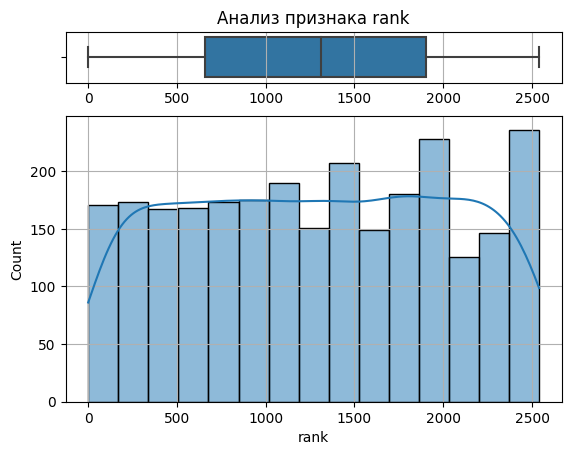

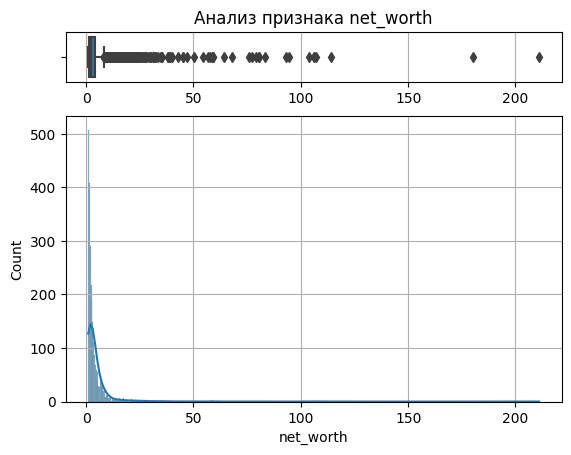

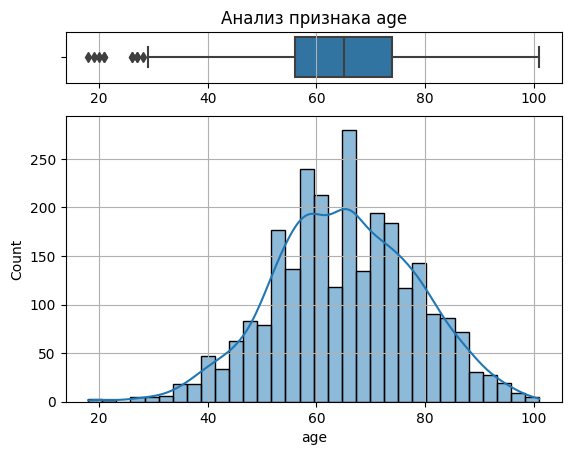

In [13]:
# рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат

# Для этого сначала поменяем типы переменных в признаках

df = df.astype({'rank': np.int32,
                'net_worth': np.float64,
                'age': np.int32,
                'Children': np.int32})

def plot_count_box(name_column):
    fig, (ax_1,ax_2) = plt.subplots(2,
                                    gridspec_kw = {'height_ratios':(.15, .85)})

    ax_1 = plt.subplot(2,1,1)
    sns.boxplot(data = df,
                x = name_column,
                ax = ax_1)
    plt.title(f'Анализ признака {name_column}')
    plt.xlabel('\n')
    plt.grid(axis = 'x')


    ax_2 = plt.subplot(2,1,2)
    sns.histplot(data = df,
                x = name_column,
                kde = True,
                ax = ax_2)
    plt.grid()

for num_column in df.columns[df.dtypes != 'object'][:-1]:
    plot_count_box(num_column)

df.describe().round(1)

- признак net_worth c кучей выбросов (самые богатые в отрыве от нижней сетки таблицы)
- также видим значительный разрыв у топ-2 от всех остальных
- распределение ассиметричное - как и положено денежной метрике
- медианное значение признака age на отметке за 60 - люди в таблице , в основном, пожилые
- в таблице всего несколько человек кому меньше 30 лет
- распределение нормальное, как и положену признаку возраст при больших выборках
- детей, в среднем, 2

### Задание 6

In [14]:
df['country'].value_counts()[:10].reset_index()

,index,country
0,United States,736
1,China,494
2,India,169
3,Germany,126
4,Russia,104
5,Hong Kong,66
6,Italy,64
7,Canada,63
8,Taiwan,52
9,United Kingdom,52


In [15]:
# рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат

df.describe(include = 'object')

,name,forbes_id,country,industry,Source of Wealth,Marital Status,Education
count,2640,2640,2640,2640,2640,2640,2640
unique,2637,2639,77,18,1043,8,1142
top,Wang Yanqing & family,warren-buffett,United States,Finance & Investments,"Real estate, Self Made",Married,"Self Made,"
freq,2,2,736,373,101,2261,1224


- всего стран в таблице 77
- чаще всего встречающаяся страна - США (736/2640)
- всего индустрий в таблице - 18
- чаще всего встречающаяся индустрия - Финансы/Инвестиции (373/2640)
- превалирующий социальный статус - Женат/замужем (1711/2640)

### Задание 7

In [16]:
# проанализируйте корреляцию между числовыми признаками, проинтерпретируйте результат

df.corr().round(2)

C:\Users\oudel\AppData\Local\Temp\ipykernel_1112\914551882.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().round(2)


,rank,net_worth,age,Children
rank,1.00,-0.45,-0.14,-0.16
net_worth,-0.45,1.00,0.07,0.13
age,-0.14,0.07,1.00,0.35
Children,-0.16,0.13,0.35,1.00


- признак rank и признак net_worth зависимы со слабым коэфф. кор = -0.45 - чем больше цифра rank, тем ниже состояние
- у пары признаков age - children есть слабый положительный коэфф. корр - есть тенденция к повышению кол-ва детей с повышением возраста
- состояние не зависит от возраста (связь: самый богатый - самый пожилой --> отсутствует)

### Задание 8

In [17]:
# далее вам необходимо поработать с кодированием категориальных признаков, выбирайте те способы кодирования, 
# которые Вам кажутся наиболее подходящими

########## EDUCATION ###########################################
education_without_univer = []
for stroka in df['Education']:
    try:
        need_info = stroka[:stroka.index(' ')]
        education_without_univer.append(need_info)
    except ValueError:
        education_without_univer.append(stroka)


print(pd.Series(education_without_univer).unique())


bachelor = ['Bachelor', 'LLB']
master = ['Master', 'EMBA', 'LLM']
doctor = ['Doctor', 'Ph.D']
self_drop = ['Self Made', 'Drop']


def education_identify(x):
    if 'Self Made' in x or 'Drop' in x:
        return 0
    if 'Bachelor' in x or 'LLB' in x:
        return 1
    if 'Master' in x or 'EMBA' in x or 'LLM' in x:
        return 2
    if 'Doctor' in x or 'Ph.D' in x:
        return 3
    else:
        return 0

df['education_identify'] = df['Education'].map(education_identify)
print('\n')
print('Уникальные значения для каждой степени образования:')
print(df['education_identify'].unique())

['Bachelor' 'Drop' 'Master' 'Self' 'Doctor' 'Diploma,' 'Doctorate,'
 'Master,' 'Associate' 'Masters' 'EMBA,' 'Medical' 'Ph.D,' 'High' 'LLB,'
 'Graduate,' 'Law' 'Registered' 'Liaoning' 'State' 'National' 'Taipei'
 'Houston' 'Doctorate' 'LLM,' 'Chinese' 'China' 'B.Com,' 'Fordham'
 'Harvard' 'City' 'The' 'Jiangsu' 'Chartered' 'Xiamen' 'London' 'Sweet'
 'error' 'Oregon' 'University' 'Waseda']


Уникальные значения для каждой степени образования:
[1 0 2 3]


In [18]:
################################ COUNTRY #############################################
# Закодируем с помощью ВВП. В ВВР входит , по итогу, хоть и косвенно, множество характеристик: кол-во трудящегося населения,
# кол-во инвестиций, бюджет и т.д. - т.е. хороший показатель, которой обрамляет множество сфер государства


country_gdp = pd.read_csv('country_gdp.csv')

df = \
df.merge(country_gdp[['country', 'gdp']],
         on = 'country',
         how = 'left')

# в этих странах показало пустые значения ВВП (т.к.  ВВП этих стран очень мал, заполним их 0)
print('Страны с очень малым ВВП: \n')
print(df[df['gdp'].isnull()]['country'])

df['gdp'] = df['gdp'].fillna(0)

def gdp_convert(x):
    if x == '—':
        return 0
    else:
        return float(x)
    
print('\n')    

df['gdp'] = df['gdp'].map(gdp_convert)
df['gdp'] = (df['gdp'] / 1000).round(2) # немного уменьшим значение, тенденция, всеравно сохранится 
df['gdp'].info()

Страны с очень малым ВВП: 

391     Eswatini (Swaziland)
1333                Guernsey
2246     St. Kitts and Nevis
Name: country, dtype: object


<class 'pandas.core.series.Series'>
Int64Index: 2640 entries, 0 to 2639
Series name: gdp
Non-Null Count  Dtype  
--------------  -----  
2640 non-null   float64
dtypes: float64(1)
memory usage: 41.2 KB


In [19]:
############ INDUSTRY ############################################
print(df['industry'].unique())

# Разбиваем индустрии на глобальные категории 

slovar_indust = { 
'manufact' : ['Automotive', 'Manufacturing', 'Metals & Mining', 'Energy', 'Diversified'],
'entertainment' : ['Fashion & Retail', 'Media & Entertainment', 'Gambling & Casinos','Sports'],
'it' : ['Technology', 'Telecom'],
'finance' : ['Finance & Investments', 'Diversified', 'Real Estate'],
'other' : [ 'Food & Beverage', 'Logistics', 'Real Estate', 'Healthcare', 'Service','Construction & Engineering', 'Diversified', 'Fashion & Retail']
}

# Создаем список меток на каждую изначальную индустрию
multi_spisok= []
for industry in df['industry']:
    spisok_metok = []
    for cat, cat_base in slovar_indust.items():
        if industry in cat_base:
            spisok_metok.append(cat)
    multi_spisok.append(spisok_metok)


# Мультиклассовое кодирование
multibinar_encoder = MultiLabelBinarizer()
multimatrix = multibinar_encoder.fit_transform(multi_spisok)

multi_data = pd.DataFrame(multimatrix, columns = multibinar_encoder.classes_)
print(multimatrix)
print(multibinar_encoder.classes_)

print('\n')

# Соединяем датасет c матрициек признаков мультиклассового кодирования
df = \
pd.concat([df,multi_data], axis = 1)


df.info()

['Fashion & Retail' 'Automotive' 'Technology' 'Finance & Investments'
 'Media & Entertainment' 'Telecom' 'Diversified' 'Food & Beverage'
 'Logistics' 'Gambling & Casinos' 'Manufacturing' 'Real Estate'
 'Metals & Mining' 'Energy' 'Healthcare' 'Service'
 'Construction & Engineering' 'Sports']
[[1 0 0 0 1]
 [0 0 0 1 0]
 [0 0 1 0 0]
 ...
 [0 1 0 0 1]
 [0 1 0 1 1]
 [0 1 0 0 0]]
['entertainment' 'finance' 'it' 'manufact' 'other']


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2640 entries, 0 to 2639
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rank                2640 non-null   int32  
 1   name                2640 non-null   object 
 2   forbes_id           2640 non-null   object 
 3   net_worth           2640 non-null   float64
 4   age                 2640 non-null   int32  
 5   country             2640 non-null   object 
 6   industry            2640 non-null   object 
 7   Source of Wealth 

In [20]:
################ Marital Status ########################

print(df['Marital Status'].unique())

# тут тоже можно выделить несколько подгрупп (в отношениях / нет / развод )

relationship = ['In Relationship', 'Engaged', 'Married', 'Widowed, Remarried']
not_relationship = ['Single','Widowed','Separated']
divorced = ['Divorced']

def MS_converter(x):
    if x in relationship:
        return 'relationship'
    if x in not_relationship:
        return 'single'
    else:
        return 'divorce'

df['MS_category'] = df['Marital Status'].map(MS_converter)

MS_encoder = OneHotEncoder()
MS_matrix = MS_encoder.fit_transform(np.array(df['MS_category']).reshape(-1,1)).toarray()
MS_columns = [i for i in MS_encoder.categories_]
MS_data = pd.DataFrame(MS_matrix, columns = MS_columns[0])

df = \
pd.concat([df, MS_data], axis = 1)

['Married' 'Single' 'Engaged' 'In Relationship' 'Widowed, Remarried'
 'Divorced' 'Widowed' 'Separated']


In [21]:
df.head() # Изначальные признаки оставим, дла дальнейших дейсвий - не мешают

,rank,name,forbes_id,net_worth,age,country,industry,Source of Wealth,Marital Status,Children,...,gdp,entertainment,finance,it,manufact,other,MS_category,divorce,relationship,single
0,1,Bernard Arnault & family,bernard-arnault,211.0,74,France,Fashion & Retail,LVMH,Married,5,...,3049.02,1,0,0,0,1,relationship,0.0,1.0,0.0
1,2,Elon Musk,elon-musk,180.0,51,United States,Automotive,"Tesla, SpaceX, Self Made",Single,10,...,26949.64,0,0,0,1,0,single,0.0,0.0,1.0
2,3,Jeff Bezos,jeff-bezos,114.0,59,United States,Technology,"Amazon, Self Made",Engaged,4,...,26949.64,0,0,1,0,0,relationship,0.0,1.0,0.0
3,4,Larry Ellison,larry-ellison,107.0,78,United States,Technology,"Oracle, Self Made",In Relationship,4,...,26949.64,0,0,1,0,0,relationship,0.0,1.0,0.0
4,5,Warren Buffett,warren-buffett,106.0,92,United States,Finance & Investments,"Berkshire Hathaway, Self Made","Widowed, Remarried",3,...,26949.64,0,1,0,0,0,relationship,0.0,1.0,0.0


In [22]:
df = df.astype({'divorce':np.int32,
                'relationship':np.int32,
                'single':np.int32})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2640 entries, 0 to 2639
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rank                2640 non-null   int32  
 1   name                2640 non-null   object 
 2   forbes_id           2640 non-null   object 
 3   net_worth           2640 non-null   float64
 4   age                 2640 non-null   int32  
 5   country             2640 non-null   object 
 6   industry            2640 non-null   object 
 7   Source of Wealth    2640 non-null   object 
 8   Marital Status      2640 non-null   object 
 9   Children            2640 non-null   int32  
 10  Education           2640 non-null   object 
 11  education_identify  2640 non-null   int64  
 12  gdp                 2640 non-null   float64
 13  entertainment       2640 non-null   int32  
 14  finance             2640 non-null   int32  
 15  it                  2640 non-null   int32  
 16  manufa

### Задания 9

C:\Users\oudel\AppData\Local\Temp\ipykernel_1112\2959553917.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.tril(df.corr()) # маска треугольного вида матрицы
C:\Users\oudel\AppData\Local\Temp\ipykernel_1112\2959553917.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


<Axes: >

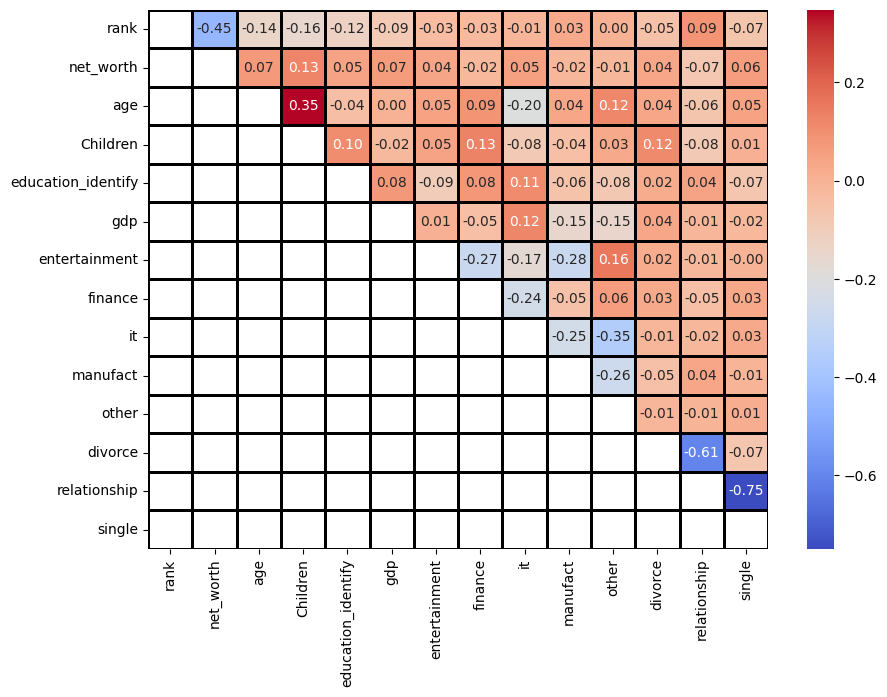

In [23]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности

mask = np.tril(df.corr()) # маска треугольного вида матрицы

plt.figure(figsize = (10, 7))

sns.heatmap(df.corr(),
            annot = True,
            fmt = '0.2f',
            cmap = 'coolwarm',
            linewidths=1,
            linecolor='black',
            mask = mask)  

- есть отрицательная коллеряция у признаков relationship - single (очевидно)
- так же есть отрицательная коллеряция у призннаков divorce - relationship (тоже очевидно)
- все остальные признаки, кроме разобранных выше по заданиям, практически не коллерируют